In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_unemployment = pd.read_csv(r"C:\Users\Admin\Desktop\TANPHAT\hocotruong\Năm ba 2025-2026\HK1_A\Thu thập và tiền xử lý dữ liệu\Đồ_án_GDP\data\processed\Unemployment_processed.csv")   


In [21]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                34 non-null     object 
 1   unemployment_value  34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 676.0+ bytes


In [22]:
# Ép kiểu cột date về datetime
df_unemployment["date"] = pd.to_datetime(df_unemployment["date"], errors="coerce")
df_unemployment = df_unemployment[
        (df_unemployment['date'].dt.year >= 2010) & 
        (df_unemployment['date'].dt.year <= 2024)
    ].copy()

In [23]:
df_unemployment.describe()

,date,unemployment_value
count,15,15.000000
mean,2017-12-30 20:48:00,1.547400
min,2010-12-31 00:00:00,0.999000
25%,2014-07-01 12:00:00,1.208500
50%,2017-12-31 00:00:00,1.523000
75%,2021-07-01 12:00:00,1.848000
max,2024-12-31 00:00:00,2.385000
std,NaN,0.412859


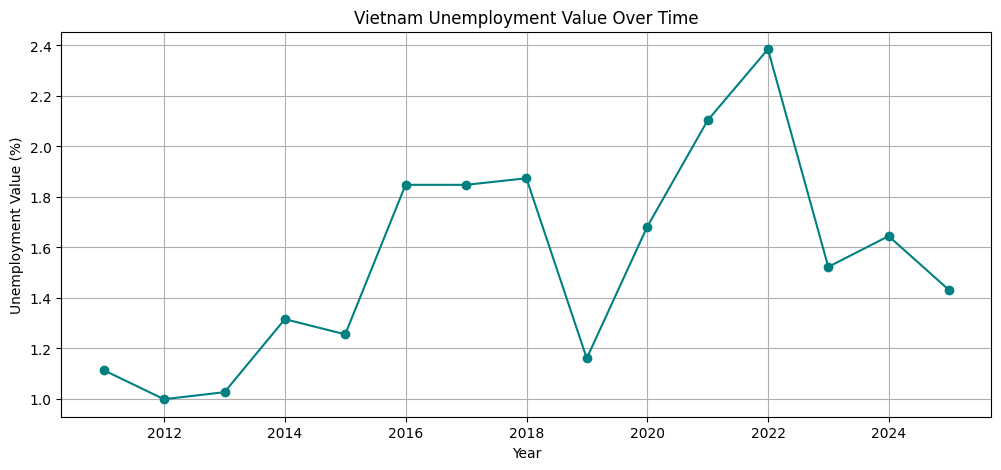

In [24]:
plt.figure(figsize=(12,5))
plt.plot(df_unemployment['date'], df_unemployment['unemployment_value'], marker='o', color='teal')
plt.title('Vietnam Unemployment Value Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Value (%)')
plt.grid(True)
plt.show()


posx and posy should be finite values
posx and posy should be finite values


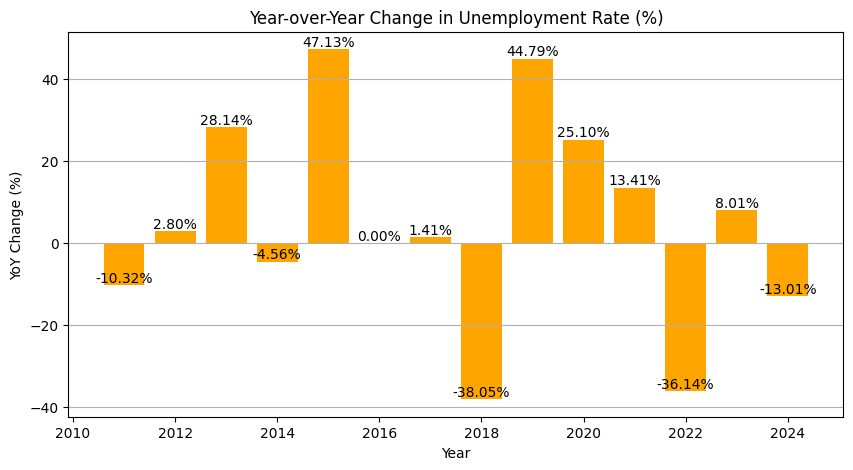

In [26]:
df_unemployment['unemployment_yoy'] = df_unemployment['unemployment_value'].pct_change() * 100

plt.figure(figsize=(10,5))
bars = plt.bar(df_unemployment['date'].dt.year, df_unemployment['unemployment_yoy'], color='orange')
plt.title('Year-over-Year Change in Unemployment Rate (%)')
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.grid(True, axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.show()
